In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
bot_deaths_df = df[(df["role"] == "BOTTOM") & (df["eventType"] == "Death")]
bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21213,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.191550,10520.0,3087.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21227,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,11.450333,7464.0,11145.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21232,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,12.520700,13370.0,4081.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21234,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,13.543833,11997.0,5313.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21238,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,15.564017,6528.0,7113.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281171,KR_6375949760,Blue,anonymous 107,kr,Zeri,14.811300,11683.0,1305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281174,KR_6375949760,Blue,anonymous 107,kr,Zeri,16.598150,8022.0,7597.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281176,KR_6375949760,Blue,anonymous 107,kr,Zeri,17.545750,1359.0,7300.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281183,KR_6376052132,Red,anonymous 108,kr,Zeri,3.583650,14121.0,5298.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


Champions' winrates

In [4]:
profiling_df = bot_deaths_df[(bot_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = bot_deaths_df[(bot_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Caitlyn,0.54,194.0
Varus,0.46,112.0
Ezreal,0.51,104.0
Zeri,0.53,92.0
Xayah,0.57,86.0
Draven,0.41,80.0
Sivir,0.52,67.0
Kaisa,0.52,56.0
Lucian,0.41,49.0


In [8]:
print("This dataset contains {} matches in which the bot died at least once".format(len(np.unique(bot_deaths_df["gameId"]))))

This dataset contains 1032 matches in which the bot died at least once


In [9]:
print("{} players died a total of {} times".format(len(np.unique(bot_deaths_df["summoner"])), bot_deaths_df.shape[0]))

25 players died a total of 5485 times


In [10]:
print("This Dataset contains an average of {} deaths per game".format((bot_deaths_df.shape[0]/len(np.unique(bot_deaths_df["gameId"])))))

This Dataset contains an average of 5.314922480620155 deaths per game


In [11]:
blueSide_bot_deaths_df = bot_deaths_df[bot_deaths_df["team"] == "Blue"]
blueSide_bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21424,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,3.075333,13184.0,2875.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21439,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,11.563833,5698.0,5906.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21444,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,13.560333,11135.0,3878.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21450,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,16.421817,6784.0,8981.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21459,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,20.006767,6169.0,6923.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281162,KR_6375949760,Blue,anonymous 107,kr,Zeri,11.342683,13511.0,2874.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281166,KR_6375949760,Blue,anonymous 107,kr,Zeri,12.396333,12534.0,2414.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281171,KR_6375949760,Blue,anonymous 107,kr,Zeri,14.811300,11683.0,1305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281174,KR_6375949760,Blue,anonymous 107,kr,Zeri,16.598150,8022.0,7597.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [12]:
gamesBlueSide = len(np.unique(blueSide_bot_deaths_df["gameId"]))
gamesBlueSide

461

In [13]:
players_df = np.unique(blueSide_bot_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_bot_deaths_df[blueSide_bot_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 100 played 19 matches
anonymous 101 played 22 matches
anonymous 103 played 20 matches
anonymous 104 played 20 matches
anonymous 105 played 14 matches
anonymous 106 played 29 matches
anonymous 107 played 19 matches
anonymous 108 played 12 matches
anonymous 82 played 17 matches
anonymous 83 played 10 matches
anonymous 84 played 27 matches
anonymous 85 played 20 matches
anonymous 86 played 21 matches
anonymous 87 played 18 matches
anonymous 88 played 14 matches
anonymous 89 played 43 matches
anonymous 90 played 18 matches
anonymous 91 played 16 matches
anonymous 92 played 7 matches
anonymous 93 played 23 matches
anonymous 94 played 8 matches
anonymous 95 played 8 matches
anonymous 97 played 11 matches
anonymous 98 played 16 matches
anonymous 99 played 29 matches


In [14]:
print("Blue side contains {} matches in which the bot died at least once".format(len(np.unique(blueSide_bot_deaths_df["gameId"]))))

Blue side contains 461 matches in which the bot died at least once


In [15]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_bot_deaths_df["summoner"])), blueSide_bot_deaths_df.shape[0]))

25 players died a total of 2301 times on the blue side


In [16]:
redSide_bot_deaths_df = bot_deaths_df[bot_deaths_df["team"] == "Red"]
redSide_bot_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21213,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.191550,10520.0,3087.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21227,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,11.450333,7464.0,11145.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21232,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,12.520700,13370.0,4081.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21234,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,13.543833,11997.0,5313.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21238,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,15.564017,6528.0,7113.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281109,KR_6376014119,Red,anonymous 107,kr,Kalista,4.746100,10642.0,2950.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281118,KR_6376014119,Red,anonymous 107,kr,Kalista,8.483450,13738.0,4861.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281134,KR_6376014119,Red,anonymous 107,kr,Kalista,15.896217,6830.0,7456.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281183,KR_6376052132,Red,anonymous 108,kr,Zeri,3.583650,14121.0,5298.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [17]:
gamesRedSide = len(np.unique(redSide_bot_deaths_df["gameId"]))
gamesRedSide

606

In [18]:
players_df = np.unique(redSide_bot_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_bot_deaths_df[redSide_bot_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 100 played 30 matches
anonymous 101 played 28 matches
anonymous 103 played 18 matches
anonymous 104 played 27 matches
anonymous 105 played 16 matches
anonymous 106 played 41 matches
anonymous 107 played 27 matches
anonymous 108 played 19 matches
anonymous 82 played 18 matches
anonymous 83 played 13 matches
anonymous 84 played 32 matches
anonymous 85 played 44 matches
anonymous 86 played 24 matches
anonymous 87 played 24 matches
anonymous 88 played 21 matches
anonymous 89 played 73 matches
anonymous 90 played 30 matches
anonymous 91 played 8 matches
anonymous 92 played 14 matches
anonymous 93 played 19 matches
anonymous 94 played 9 matches
anonymous 95 played 16 matches
anonymous 97 played 8 matches
anonymous 98 played 20 matches
anonymous 99 played 27 matches


In [19]:
print("Red side contains {} matches in which the bot died at least once".format(len(np.unique(redSide_bot_deaths_df["gameId"]))))

Red side contains 606 matches in which the bot died at least once


In [20]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_bot_deaths_df["summoner"])), redSide_bot_deaths_df.shape[0]))

25 players died a total of 3184 times on the red side


function to visualize the results

In [21]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Bot Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Bot Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [22]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [23]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [24]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [25]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [26]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

---
### Clustering Red Team Victory

In [27]:
redSideVictory_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21281,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,9.672150,12796.0,2623.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21291,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,13.441017,13561.0,2555.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21297,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,15.995733,10834.0,4750.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21302,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,18.978267,7840.0,8742.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21312,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,22.303417,6747.0,3074.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281109,KR_6376014119,Red,anonymous 107,kr,Kalista,4.746100,10642.0,2950.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281118,KR_6376014119,Red,anonymous 107,kr,Kalista,8.483450,13738.0,4861.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281134,KR_6376014119,Red,anonymous 107,kr,Kalista,15.896217,6830.0,7456.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281183,KR_6376052132,Red,anonymous 108,kr,Zeri,3.583650,14121.0,5298.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [28]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == True)].copy()

In [29]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [30]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

51.15511551155115

In [31]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_bot_deaths_df.shape[0]) * 100
winRateRedSide

38.347989949748744

In [32]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 11 matches on the red side
anonymous 100 has an average of 4.2727272727272725 deaths per game when winning on the red side

anonymous 101 won 17 matches on the red side
anonymous 101 has an average of 3.3529411764705883 deaths per game when winning on the red side

anonymous 103 won 7 matches on the red side
anonymous 103 has an average of 3.7142857142857144 deaths per game when winning on the red side

anonymous 104 won 17 matches on the red side
anonymous 104 has an average of 3.2941176470588234 deaths per game when winning on the red side

anonymous 105 won 10 matches on the red side
anonymous 105 has an average of 4.6 deaths per game when winning on the red side

anonymous 106 won 19 matches on the red side
anonymous 106 has an average of 3.8421052631578947 deaths per game when winning on the red side

anonymous 107 won 10 matches on the red side
anonymous 107 has an average of 5.6 deaths per game when winning on the red side

anonymous 108 won 9 matches on the re

In [33]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 310 matches in which the jungler died at least once
25 players died a total of 1221 times on the red side
Victory games on red side contains an average of 3.9387096774193546 deaths per game


In [34]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
21281,12796.0,2623.0,9.672150
21291,13561.0,2555.0,13.441017
21297,10834.0,4750.0,15.995733
21302,7840.0,8742.0,18.978267
21312,6747.0,3074.0,22.303417
...,...,...,...
281109,10642.0,2950.0,4.746100
281118,13738.0,4861.0,8.483450
281134,6830.0,7456.0,15.896217
281183,14121.0,5298.0,3.583650


Time discretization

In [35]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [36]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [37]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [38]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [39]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
21281,0.936515,-0.761578,-1
21291,1.138146,-0.783955,-1
21297,0.419390,-0.061641,0
21302,-0.369740,1.252016,0
21312,-0.657822,-0.613166,0
...,...,...,...
281109,0.368784,-0.653971,-1
281118,1.184798,-0.025114,-1
281134,-0.635946,0.828829,0
281183,1.285745,0.118691,-1


[2 3 4 5 6 7 8 9]


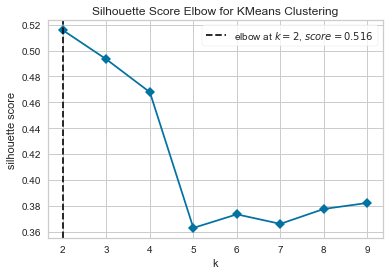

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [40]:
ks = np.arange(2,10, 1)
print(ks)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

In [321]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.515759312815226
Silhouette score for k=3: 0.4931601568333616
Silhouette score for k=4: 0.467809540847269
Silhouette score for k=5: 0.3633897346789198
Silhouette score for k=6: 0.35463091148683057
Silhouette score for k=7: 0.36250274785842873
Silhouette score for k=8: 0.3777488340113065
Silhouette score for k=9: 0.3808590563257875
Silhouette score for k=10: 0.38445820520314195
Silhouette score for k=11: 0.3894741335605772
Silhouette score for k=12: 0.34840346302029385
Silhouette score for k=13: 0.3586796968909829
Silhouette score for k=14: 0.3631848865189372
Silhouette score for k=15: 0.36364574140597655
Silhouette score for k=16: 0.35378018008422457
Silhouette score for k=17: 0.346864749957611
Silhouette score for k=18: 0.3715036436922381
Silhouette score for k=19: 0.37604600150113227
Silhouette score for k=20: 0.37233410566500696
Silhouette score for k=25: 0.3956272042238219


k = 4

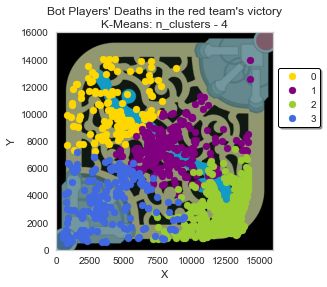

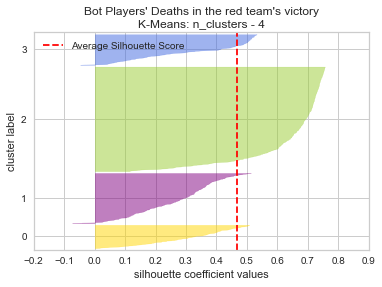

Silhouette score: 0.467809540847269
2    612
1    293
3    179
0    137
Name: cluster, dtype: int64

Inertia: 788.2651906791796

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4348.598540,10330.510949,-0.014599
1,1,8309.116041,7403.672355,-0.116041
2,2,12288.240196,2912.937908,-0.949346
3,3,4104.709497,3693.804469,0.324022


In [322]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "purple", "yellowgreen", "royalblue"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

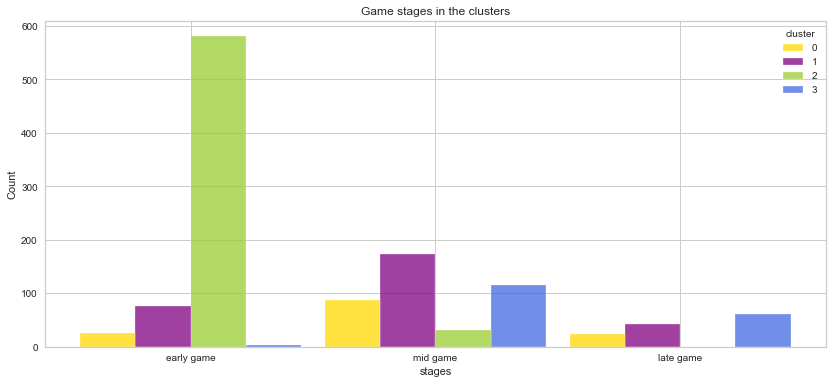

In [323]:
stagesPerClusterV2(redSideVictory_df, colors)

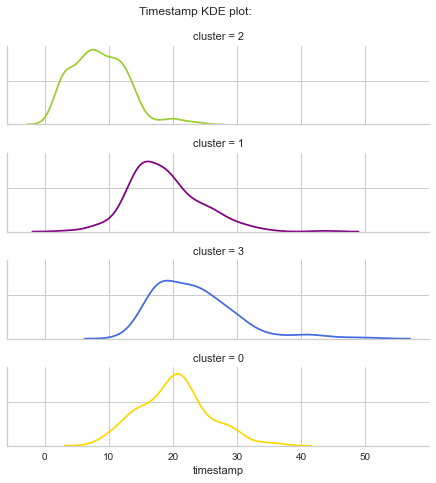

In [324]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

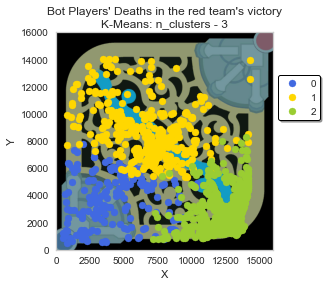

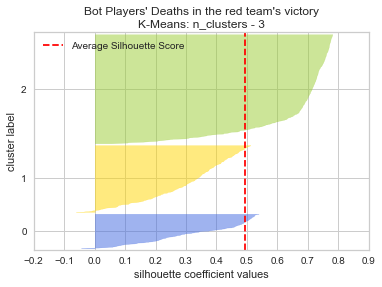

Silhouette score: 0.4931601568333616
2    633
1    388
0    200
Name: cluster, dtype: int64

Inertia: 962.2376849593962

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4428.655000,3882.295000,0.320000
1,1,6790.865979,8608.126289,-0.095361
2,2,12266.805687,3020.620853,-0.925750


In [325]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [326]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2350.597062,1825.342285,0.507543
1,1,2461.707745,1943.362627,0.624813
2,2,1467.591662,1469.752601,0.268135


In [327]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10369.0,505.0,7799.0,521.0,1,-1
1,1,14282.0,792.0,14050.0,5326.0,1,-1
2,2,14146.0,7149.0,8299.0,767.0,1,-1


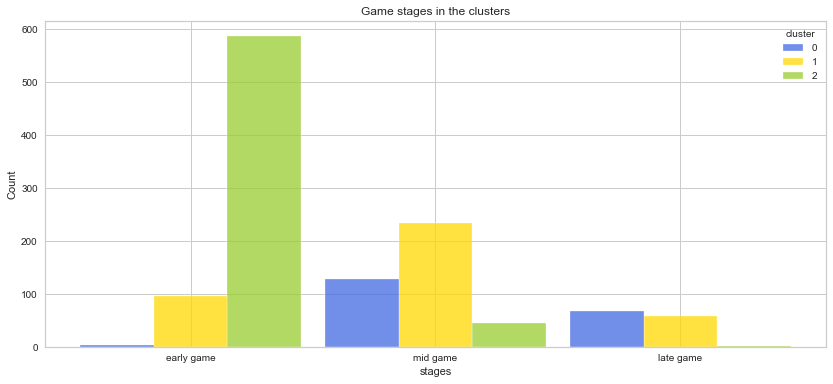

In [328]:
stagesPerClusterV2(redSideVictory_df, colors)

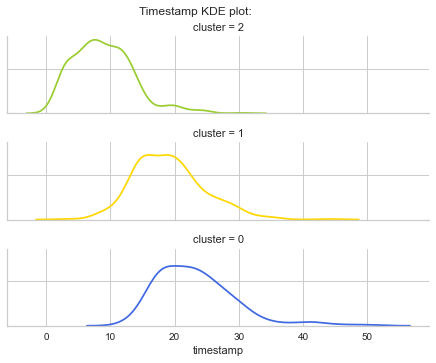

In [329]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [330]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,66
Varus,30
Zeri,30
Ezreal,29
Draven,22
Xayah,21
Sivir,20
Kaisa,18
Jhin,15
Lucian,12


Deaths with each champion:

In [331]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn     258
Varus       112
Ezreal      109
Draven      101
Xayah        99
Zeri         97
Sivir        77
Kaisa        71
Lucian       57
Jhin         55
Aphelios     45
Samira       33
Jinx         28
Kalista      25
Ziggs        17
Tristana     11
Jayce         8
Twitch        7
Vayne         6
Nilah         4
Ashe          1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [332]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 19 champions:
 ['Aphelios' 'Caitlyn' 'Draven' 'Ezreal' 'Jayce' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Lucian' 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus'
 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     56
Draven      22
Lucian      18
Ezreal      16
Xayah       15
Varus       12
Zeri        12
Kaisa       11
Sivir        7
Jinx         6
Aphelios     5
Jhin         5
Samira       5
Kalista      3
Tristana     2
Nilah        2
Twitch       1
Jayce        1
Ziggs        1
Name: champion, dtype: int64

Cluster 1 - died with 19 champions:
 ['Aphelios' 'Caitlyn' 'Draven' 'Ezreal' 'Jayce' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Lucian' 'Nilah' 'Samira' 'Sivir' 'Tristana' 'Twitch' 'Varus'
 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     84
Xayah       44
Varus       34
Draven      32
Zeri        29
Ezreal      28
Sivir       27
Kaisa       21
Aphelios    19
Lucian      17
Jhin        16
Jinx        13
Samira       9
Kalista 

---
### Clustering Red Team Defeat

In [333]:
redSideDefeat_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21213,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,4.191550,10520.0,3087.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21227,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,11.450333,7464.0,11145.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21232,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,12.520700,13370.0,4081.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21234,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,13.543833,11997.0,5313.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21238,EUW1_6274059269,Red,anonymous 82,euw1,Kaisa,15.564017,6528.0,7113.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280758,KR_6375985152,Red,anonymous 100,kr,Draven,7.052833,13573.0,4474.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
280761,KR_6375985152,Red,anonymous 100,kr,Draven,8.797750,11699.0,2220.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
280765,KR_6375985152,Red,anonymous 100,kr,Draven,10.438983,13558.0,3996.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
280769,KR_6375985152,Red,anonymous 100,kr,Draven,12.560433,13928.0,4830.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [334]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Red") & (bot_deaths_df["victory"] == False)].copy()

In [335]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_bot_deaths_df.shape[0]) * 100
winRateRedSide

61.65201005025126

In [336]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 19 matches on the red side
anonymous 100 has an average of 8.052631578947368 deaths per game when losing on the red side

anonymous 101 lost 11 matches on the red side
anonymous 101 has an average of 8.181818181818182 deaths per game when losing on the red side

anonymous 103 lost 11 matches on the red side
anonymous 103 has an average of 7.090909090909091 deaths per game when losing on the red side

anonymous 104 lost 10 matches on the red side
anonymous 104 has an average of 6.9 deaths per game when losing on the red side

anonymous 105 lost 6 matches on the red side
anonymous 105 has an average of 7.666666666666667 deaths per game when losing on the red side

anonymous 106 lost 22 matches on the red side
anonymous 106 has an average of 5.863636363636363 deaths per game when losing on the red side

anonymous 107 lost 17 matches on the red side
anonymous 107 has an average of 8.176470588235293 deaths per game when losing on the red side

anonymous 108 lost 10 matche

In [337]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 296 matches in which the jungler died at least once
25 players died a total of 1963 times on the red side
Defeat games on red side contains an average of 6.631756756756757 deaths per game


In [338]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
21213,10520.0,3087.0,4.191550
21227,7464.0,11145.0,11.450333
21232,13370.0,4081.0,12.520700
21234,11997.0,5313.0,13.543833
21238,6528.0,7113.0,15.564017
...,...,...,...
280758,13573.0,4474.0,7.052833
280761,11699.0,2220.0,8.797750
280765,13558.0,3996.0,10.438983
280769,13928.0,4830.0,12.560433


Time discretization

In [339]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [340]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [341]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [342]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [343]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
21213,0.089971,-0.924402,-1
21227,-0.894721,1.262308,-1
21232,1.008286,-0.654659,-1
21234,0.565884,-0.320330,-1
21238,-1.196316,0.168139,0
...,...,...,...
280758,1.073696,-0.548010,-1
280761,0.469863,-1.159681,-1
280765,1.068863,-0.677726,-1
280769,1.188083,-0.451402,-1


In [344]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.4910391636569913
Silhouette score for k=3: 0.45740548998700786
Silhouette score for k=4: 0.43296568320712187
Silhouette score for k=5: 0.33546147314728186
Silhouette score for k=6: 0.3488515951771159
Silhouette score for k=7: 0.3460490262319611
Silhouette score for k=8: 0.35772527338401305
Silhouette score for k=9: 0.35748224357710384
Silhouette score for k=10: 0.34604492458864083


Silhouette score for k=11: 0.3625485663989585
Silhouette score for k=12: 0.35506341968656807
Silhouette score for k=13: 0.36536591016929765
Silhouette score for k=14: 0.3582501522198982
Silhouette score for k=15: 0.3679171316128331
Silhouette score for k=16: 0.37077777264243095
Silhouette score for k=17: 0.3796520212749464
Silhouette score for k=18: 0.3688803589295326
Silhouette score for k=19: 0.3711545737454833
Silhouette score for k=20: 0.38624479813052515
Silhouette score for k=25: 0.38133052895168495


k = 4

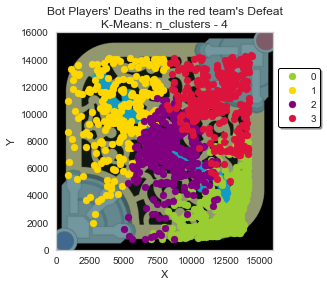

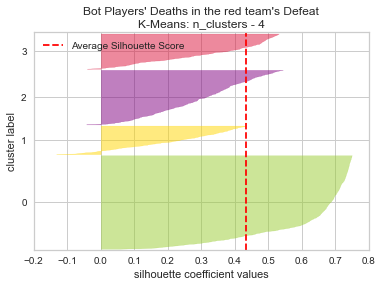

Silhouette score: 0.43296568320712187
0    866
2    506
3    326
1    265
Name: cluster, dtype: int64

Inertia: 1365.3560639089694

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12455.956120,3191.035797,-0.926097
1,1,4832.724528,10124.452830,0.256604
2,2,8300.503953,7411.112648,-0.043478
3,3,11763.978528,10889.957055,0.457055


In [345]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "purple", "crimson"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"Defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

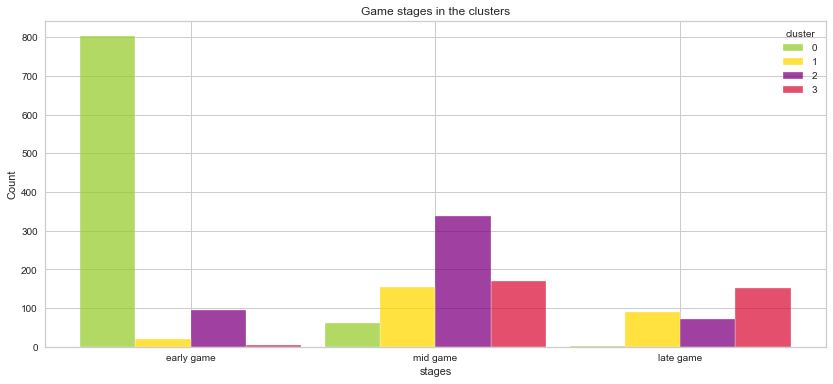

In [346]:
stagesPerClusterV2(redSideDefeat_df, colors)

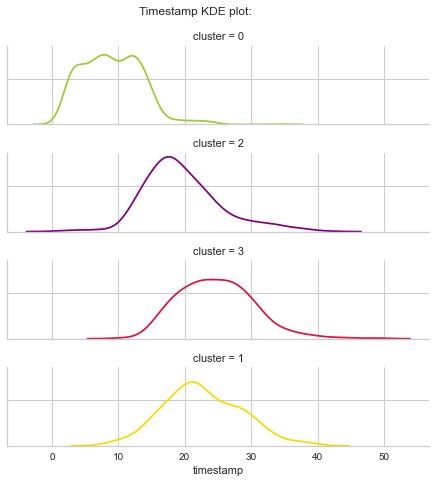

In [347]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

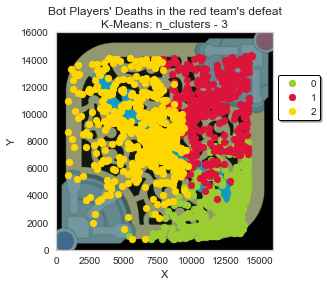

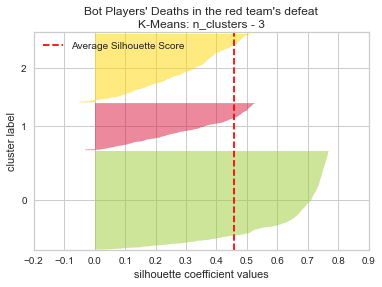

Silhouette score: 0.45740548998700786
0    904
2    628
1    431
Name: cluster, dtype: int64

Inertia: 1644.470397951966

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,12334.191372,3247.414823,-0.896018
1,1,11281.816705,10327.542923,0.392111
2,2,6512.850318,8534.605096,0.054140


In [348]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [349]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1493.517603,1573.891307,0.322850
1,1,1702.856349,2295.011817,0.542259
2,2,1989.042139,2417.068471,0.597446


In [350]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14144.0,5385.0,8477.0,758.0,1,-1
1,1,14417.0,7387.0,14330.0,3742.0,1,-1
2,2,9690.0,893.0,14110.0,765.0,1,-1


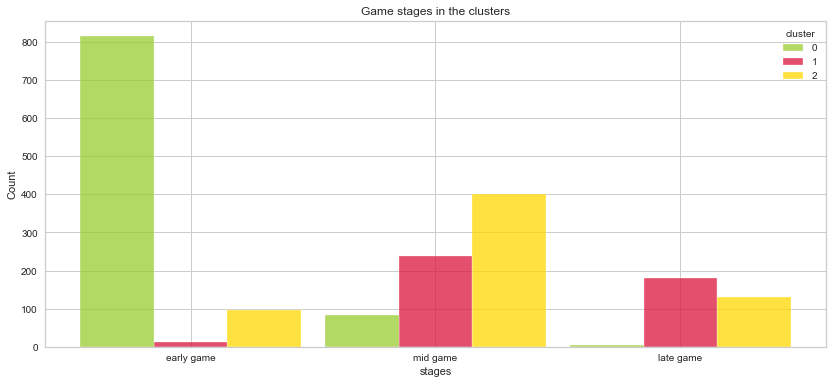

In [351]:
stagesPerClusterV2(redSideDefeat_df, colors)

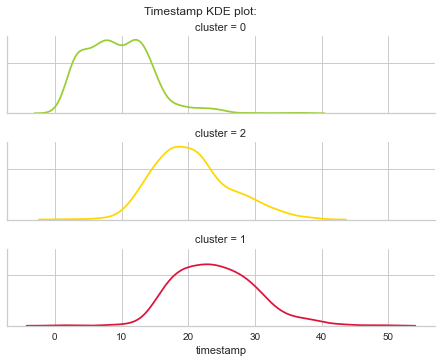

In [352]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [353]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,53
Varus,35
Draven,28
Ezreal,27
Zeri,21
Lucian,19
Xayah,19
Sivir,17
Jhin,14
Kaisa,14


Deaths with each champion:

In [354]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn     359
Varus       236
Draven      198
Ezreal      183
Zeri        133
Xayah       117
Lucian      116
Sivir        98
Kaisa        90
Jhin         83
Kalista      72
Samira       52
Jinx         48
Aphelios     45
Tristana     29
Nilah        29
Ziggs        25
Ashe         23
Rumble       10
Karthus       9
Twitch        8
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [355]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 21 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'Nilah' 'Rumble' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     174
Varus       117
Draven       93
Ezreal       72
Lucian       62
Zeri         52
Sivir        48
Xayah        48
Kaisa        45
Kalista      37
Jhin         34
Samira       24
Aphelios     22
Jinx         21
Tristana     14
Ashe         10
Ziggs         9
Nilah         9
Rumble        6
Karthus       5
Twitch        2
Name: champion, dtype: int64

Cluster 1 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'Nilah' 'Rumble' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Xayah' 'Zeri' 'Ziggs']
Caitlyn     69
Varus       53
Ezreal      44
Zeri        37
Draven      32
Lucian      27
Jhin        26
Sivir      

---
### Clustering Blue Team Victory

In [356]:
blueSideVictory_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21582,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,7.061050,11624.0,4185.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21593,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,12.860333,12360.0,1450.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21615,EUW1_6273948263,Blue,anonymous 84,euw1,Caitlyn,21.910167,9549.0,10097.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
22259,EUW1_6270938687,Blue,anonymous 85,euw1,Ezreal,3.564200,13495.0,2369.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
23098,EUW1_6271701742,Blue,anonymous 87,euw1,Karthus,9.316917,12033.0,1128.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280984,KR_6375966263,Blue,anonymous 105,kr,Ezreal,6.916733,13473.0,2306.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
280994,KR_6375966263,Blue,anonymous 105,kr,Ezreal,12.238633,13133.0,2117.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281001,KR_6375966263,Blue,anonymous 105,kr,Ezreal,16.119750,6204.0,6468.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281011,KR_6375966263,Blue,anonymous 105,kr,Ezreal,19.340850,8007.0,8613.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [357]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == True)].copy()

In [358]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [359]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

49.0238611713666

In [360]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_bot_deaths_df.shape[0]) * 100
winRateBlueSide

38.157322903085614

In [361]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 won 7 matches on the blue side
anonymous 100 has an average of 4.285714285714286 deaths per game when winning on the blue side

anonymous 101 won 12 matches on the blue side
anonymous 101 has an average of 5.416666666666667 deaths per game when winning on the blue side

anonymous 103 won 11 matches on the blue side
anonymous 103 has an average of 5.454545454545454 deaths per game when winning on the blue side

anonymous 104 won 14 matches on the blue side
anonymous 104 has an average of 3.857142857142857 deaths per game when winning on the blue side

anonymous 105 won 5 matches on the blue side
anonymous 105 has an average of 4.0 deaths per game when winning on the blue side

anonymous 106 won 15 matches on the blue side
anonymous 106 has an average of 3.8 deaths per game when winning on the blue side

anonymous 107 won 11 matches on the blue side
anonymous 107 has an average of 4.090909090909091 deaths per game when winning on the blue side

anonymous 108 won 7 matches o

In [362]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 226 matches in which the jungler died at least once
25 players died a total of 878 times on the blue side
Victory games on blue side contains an average of 3.8849557522123894 deaths per game


In [363]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
21582,11624.0,4185.0,7.061050
21593,12360.0,1450.0,12.860333
21615,9549.0,10097.0,21.910167
22259,13495.0,2369.0,3.564200
23098,12033.0,1128.0,9.316917
...,...,...,...
280984,13473.0,2306.0,6.916733
280994,13133.0,2117.0,12.238633
281001,6204.0,6468.0,16.119750
281011,8007.0,8613.0,19.340850


Time discretization

In [364]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [365]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [366]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [367]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [368]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
21582,0.476091,-0.367435,-1
21593,0.728670,-1.108605,-1
21615,-0.236002,1.234684,0
22259,1.118177,-0.859561,-1
23098,0.616451,-1.195865,-1
...,...,...,...
280984,1.110627,-0.876634,-1
280994,0.993947,-0.927852,-1
281001,-1.383932,0.251245,0
281011,-0.765182,0.832528,0


In [369]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.5255935922732959
Silhouette score for k=3: 0.5185248158864317
Silhouette score for k=4: 0.48614345765879124
Silhouette score for k=5: 0.3755327862024034
Silhouette score for k=6: 0.3639001374584833
Silhouette score for k=7: 0.3790390577296531
Silhouette score for k=8: 0.3904343030075923
Silhouette score for k=9: 0.3538770609103441
Silhouette score for k=10: 0.360877727025671
Silhouette score for k=11: 0.34491853661411387
Silhouette score for k=12: 0.365913179238207
Silhouette score for k=13: 0.3667235749611105
Silhouette score for k=14: 0.3691660978198796
Silhouette score for k=15: 0.3745620970041912
Silhouette score for k=16: 0.36372224590436364
Silhouette score for k=17: 0.3785329671286136
Silhouette score for k=18: 0.3478508869211761
Silhouette score for k=19: 0.35632792120802353


Silhouette score for k=20: 0.3585260857163088
Silhouette score for k=25: 0.3840440061659839


k = 4

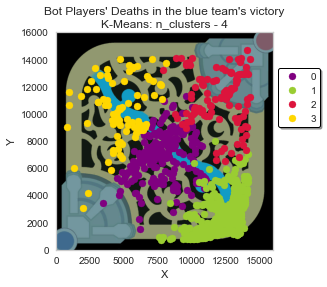

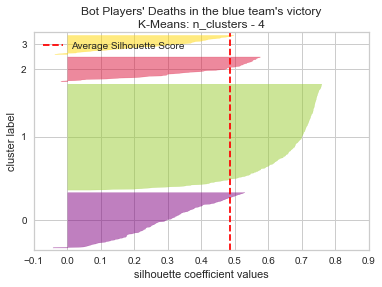

Silhouette score: 0.48614345765879124
1    453
0    237
2    106
3     82
Name: cluster, dtype: int64

Inertia: 541.6197168321164

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7892.172996,7012.042194,-0.071730
1,1,12061.668874,2612.459161,-0.949227
2,2,11938.990566,11121.018868,0.443396
3,3,4730.560976,10253.219512,0.012195


In [370]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["purple", "yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

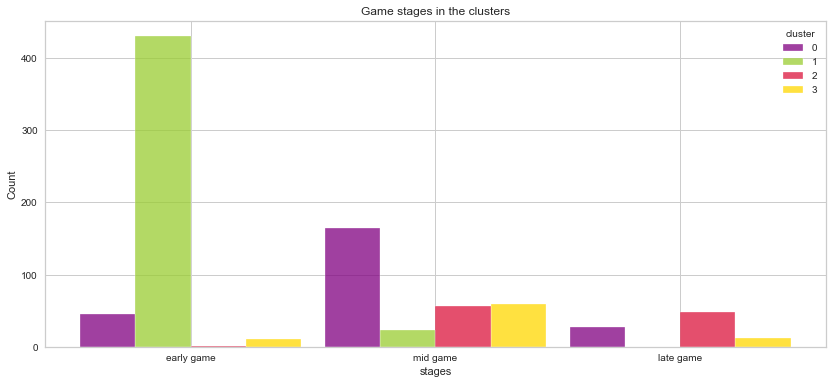

In [371]:
stagesPerClusterV2(blueSideVictory_df, colors)

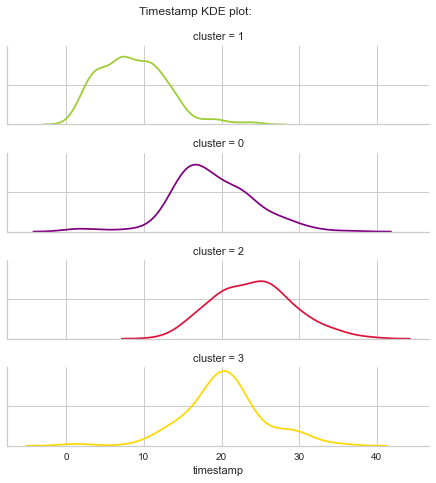

In [372]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

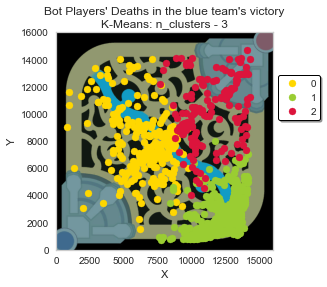

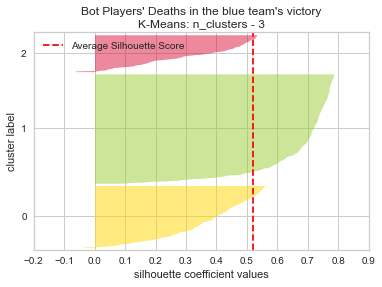

Silhouette score: 0.5185248158864317
1    461
0    262
2    155
Name: cluster, dtype: int64

Inertia: 645.9752426626676

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6488.984733,7879.347328,-0.083969
1,1,12025.694143,2646.626898,-0.934924
2,2,11250.716129,10196.167742,0.348387


In [373]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "crimson"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [374]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1787.057022,2395.492647,0.524778
1,1,1355.292830,1409.271463,0.255303
2,2,1717.023673,2386.979305,0.563326


In [375]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9724.0,818.0,14064.0,1518.0,1,-1
1,1,14122.0,7591.0,8030.0,754.0,1,-1
2,2,14266.0,7638.0,14672.0,4001.0,1,-1


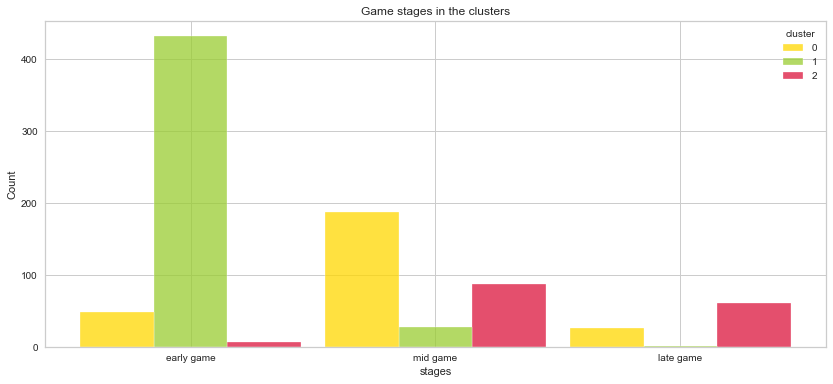

In [376]:
stagesPerClusterV2(blueSideVictory_df, colors)

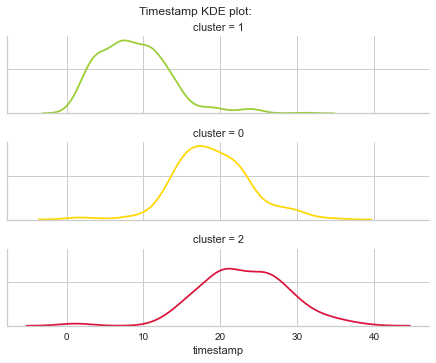

In [377]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [378]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,39
Xayah,28
Ezreal,24
Varus,21
Zeri,19
Sivir,15
Kaisa,11
Draven,11
Kalista,9
Samira,8


Deaths with each champion:

In [379]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        133
Xayah          102
Ezreal          90
Zeri            83
Varus           74
Sivir           58
Draven          55
Jinx            41
Kalista         41
Samira          40
Lucian          37
Kaisa           30
Aphelios        27
Jhin            16
Ashe            12
Tristana         8
Ziggs            7
MissFortune      7
Vayne            6
Twitch           6
Karthus          3
Yasuo            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [380]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 22 champions when they won on the red side

Cluster 0 - died with 21 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Twitch'
 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn        41
Xayah          33
Ezreal         27
Varus          26
Zeri           22
Sivir          17
Kalista        14
Draven         12
Lucian         11
Aphelios       10
Jinx           10
Samira         10
Jhin            6
Kaisa           5
Ashe            4
MissFortune     4
Ziggs           4
Karthus         2
Vayne           2
Yasuo           1
Twitch          1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Samira' 'Sivir' 'Tristana'
 'Twitch' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn        68
Xayah          54
Ezreal         49
Drave

---
### Clustering Blue Team Defeat

In [381]:
blueSideDefeat_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21424,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,3.075333,13184.0,2875.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21439,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,11.563833,5698.0,5906.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21444,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,13.560333,11135.0,3878.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21450,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,16.421817,6784.0,8981.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21459,EUW1_6273590443,Blue,anonymous 83,euw1,Caitlyn,20.006767,6169.0,6923.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281162,KR_6375949760,Blue,anonymous 107,kr,Zeri,11.342683,13511.0,2874.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281166,KR_6375949760,Blue,anonymous 107,kr,Zeri,12.396333,12534.0,2414.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281171,KR_6375949760,Blue,anonymous 107,kr,Zeri,14.811300,11683.0,1305.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281174,KR_6375949760,Blue,anonymous 107,kr,Zeri,16.598150,8022.0,7597.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [382]:
profiling_df = bot_deaths_df[(bot_deaths_df["team"] == "Blue") & (bot_deaths_df["victory"] == False)].copy()

In [383]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_bot_deaths_df.shape[0]) * 100
winRateBlueSide

61.842677096914386

In [384]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 100 lost 12 matches on the blue side
anonymous 100 has an average of 7.333333333333333 deaths per game when losing on the blue side

anonymous 101 lost 10 matches on the blue side
anonymous 101 has an average of 8.1 deaths per game when losing on the blue side

anonymous 103 lost 9 matches on the blue side
anonymous 103 has an average of 7.222222222222222 deaths per game when losing on the blue side

anonymous 104 lost 6 matches on the blue side
anonymous 104 has an average of 6.666666666666667 deaths per game when losing on the blue side

anonymous 105 lost 9 matches on the blue side
anonymous 105 has an average of 4.0 deaths per game when losing on the blue side

anonymous 106 lost 14 matches on the blue side
anonymous 106 has an average of 5.071428571428571 deaths per game when losing on the blue side

anonymous 107 lost 8 matches on the blue side
anonymous 107 has an average of 8.375 deaths per game when losing on the blue side

anonymous 108 lost 5 matches on the blue si

In [385]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 235 matches in which the jungler died at least once
25 players died a total of 1423 times on the blue side
Defeat games on blue side contains an average of 6.05531914893617 deaths per game


In [386]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
21424,13184.0,2875.0,3.075333
21439,5698.0,5906.0,11.563833
21444,11135.0,3878.0,13.560333
21450,6784.0,8981.0,16.421817
21459,6169.0,6923.0,20.006767
...,...,...,...
281162,13511.0,2874.0,11.342683
281166,12534.0,2414.0,12.396333
281171,11683.0,1305.0,14.811300
281174,8022.0,7597.0,16.598150


Time discretization

In [387]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [388]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [389]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [390]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [391]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
21424,1.264461,-0.553702,-1
21439,-0.720275,0.434707,-1
21444,0.721217,-0.226624,-1
21450,-0.432348,1.437464,0
21459,-0.595401,0.766350,0
...,...,...,...
281162,1.351158,-0.554028,-1
281166,1.092129,-0.704034,-1
281171,0.866507,-1.065679,-1
281174,-0.104121,0.986142,0


In [392]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.49785406966333945
Silhouette score for k=3: 0.4521391497287084
Silhouette score for k=4: 0.4415118816000147
Silhouette score for k=5: 0.4271902767301921
Silhouette score for k=6: 0.333328371004164
Silhouette score for k=7: 0.35117004789315504
Silhouette score for k=8: 0.3644138747695352
Silhouette score for k=9: 0.3633721076089703
Silhouette score for k=10: 0.3832057595156876
Silhouette score for k=11: 0.3877281076382784
Silhouette score for k=12: 0.3797557615999525
Silhouette score for k=13: 0.38967636597201977
Silhouette score for k=14: 0.39747487990544267


Silhouette score for k=15: 0.39727297053006966
Silhouette score for k=16: 0.38107739702083915
Silhouette score for k=17: 0.3862572951605429
Silhouette score for k=18: 0.38814465121009356
Silhouette score for k=19: 0.3875625406046702
Silhouette score for k=20: 0.39585569921265995
Silhouette score for k=25: 0.3982092805792661


k = 4

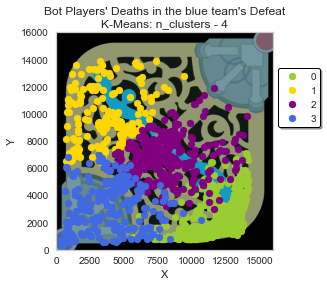

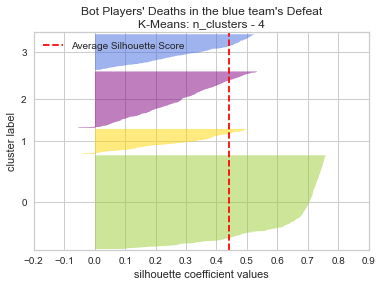

Silhouette score: 0.4415118816000147
0    633
2    379
3    242
1    169
Name: cluster, dtype: int64

Inertia: 978.3177388743219

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,11760.374408,2324.290679,-0.916272
1,1,3667.017751,9906.159763,0.059172
2,2,7724.643799,6724.345646,-0.002639
3,3,4059.789256,3361.020661,0.475207


In [393]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "purple", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"Defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

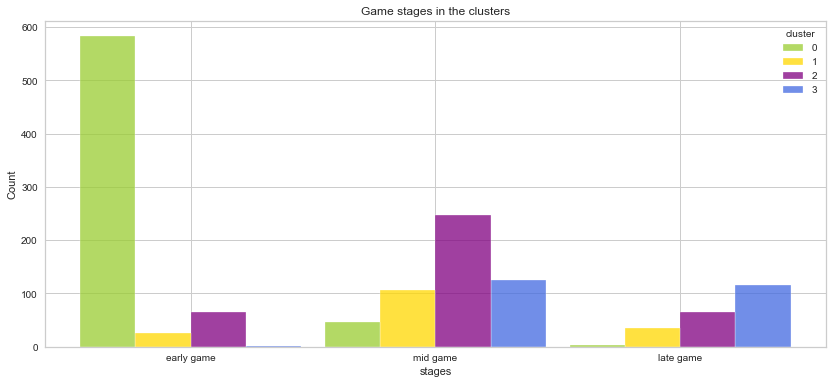

In [394]:
stagesPerClusterV2(blueSideDefeat_df, colors)

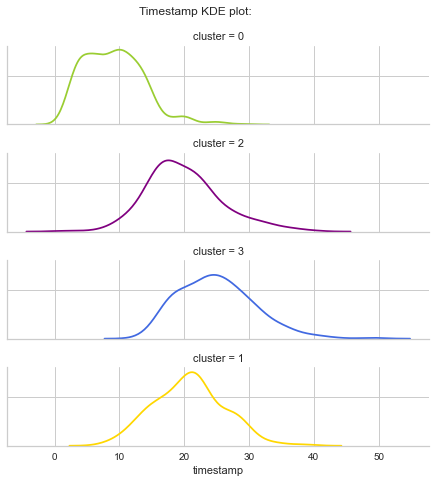

In [395]:
kdeTimestamp(profiling_df, cluster_colors)

K-Means with k = 3

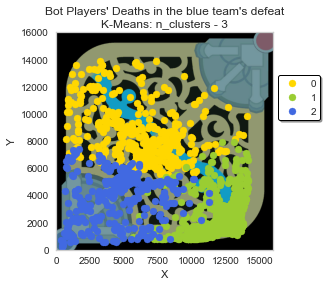

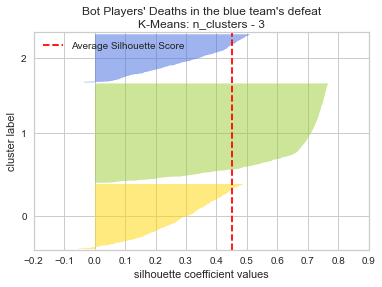

Silhouette score: 0.4521391497287084
1    666
0    436
2    321
Name: cluster, dtype: int64

Inertia: 1199.8299872466553

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6165.474771,8337.151376,0.009174
1,1,11704.094595,2481.430931,-0.884384
2,2,4645.102804,3799.626168,0.401869


In [396]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "yellowgreen", "royalblue"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [397]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2556.019778,1977.967752,0.590372
1,1,1559.060473,1455.403998,0.355349
2,2,2370.311050,1748.900697,0.521079


In [398]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14022.0,765.0,13917.0,5418.0,1,-1
1,1,14122.0,5681.0,7941.0,759.0,1,-1
2,2,11291.0,357.0,7414.0,226.0,1,-1


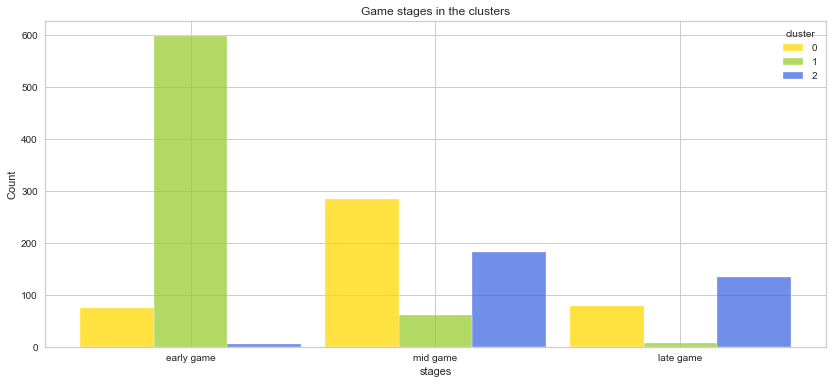

In [399]:
stagesPerClusterV2(blueSideDefeat_df, colors)

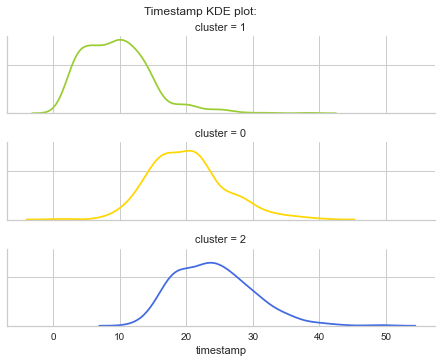

In [400]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [401]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
Caitlyn,36
Varus,26
Ezreal,24
Zeri,22
Draven,19
Xayah,18
Sivir,15
Kaisa,13
Jhin,12
Lucian,10


Deaths with each champion:

In [402]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



Caitlyn        215
Varus          173
Ezreal         156
Zeri           127
Draven         121
Xayah           98
Sivir           92
Kaisa           75
Jhin            68
Lucian          59
Samira          51
Aphelios        35
Tristana        31
Kalista         24
MissFortune     16
Nilah           16
Karthus         16
Jinx            15
Yasuo           10
Vayne           10
Ziggs            8
Cassiopeia       5
Ashe             2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [403]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 23 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Aphelios' 'Caitlyn' 'Cassiopeia' 'Draven' 'Ezreal' 'Jhin' 'Jinx' 'Kaisa'
 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Nilah' 'Samira' 'Sivir'
 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn        80
Varus          57
Ezreal         51
Zeri           40
Draven         40
Sivir          26
Xayah          22
Lucian         20
Samira         16
Kaisa          14
Tristana       14
Aphelios       12
Jhin           12
Kalista         6
Yasuo           6
MissFortune     4
Karthus         4
Vayne           4
Jinx            3
Ziggs           2
Nilah           2
Cassiopeia      1
Name: champion, dtype: int64

Cluster 1 - died with 23 champions:
 ['Aphelios' 'Ashe' 'Caitlyn' 'Cassiopeia' 'Draven' 'Ezreal' 'Jhin' 'Jinx'
 'Kaisa' 'Kalista' 'Karthus' 'Lucian' 'MissFortune' 'Nilah' 'Samira'
 'Sivir' 'Tristana' 'Varus' 'Vayne' 'Xayah' 'Yasuo' 'Zeri' 'Ziggs']
Caitlyn      

---

### Blue Win Rate vs Red Win Rate

In [404]:
wins_df = bot_deaths_df[bot_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
21281,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,9.672150,12796.0,2623.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21291,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,13.441017,13561.0,2555.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21297,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,15.995733,10834.0,4750.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21302,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,18.978267,7840.0,8742.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
21312,EUW1_6273990360,Red,anonymous 82,euw1,Sivir,22.303417,6747.0,3074.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281109,KR_6376014119,Red,anonymous 107,kr,Kalista,4.746100,10642.0,2950.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281118,KR_6376014119,Red,anonymous 107,kr,Kalista,8.483450,13738.0,4861.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281134,KR_6376014119,Red,anonymous 107,kr,Kalista,15.896217,6830.0,7456.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM
281183,KR_6376052132,Red,anonymous 108,kr,Zeri,3.583650,14121.0,5298.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,BOTTOM


In [405]:
wins = len(np.unique(wins_df["gameId"]))
wins

536

In [406]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 57.83582089552238 vs Blue: 42.16417910447761


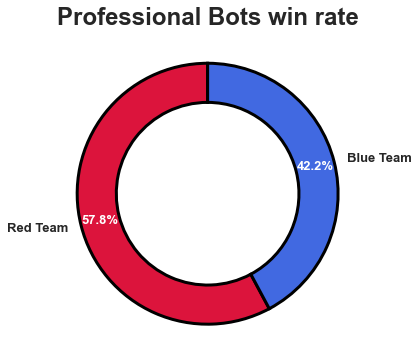

In [407]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Bots win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [408]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 58.17055740828966 vs Blue: 41.82944259171034
